<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/aditijuneja/github-bipartite-graph-datasetdevelopersrepos

Step 1: Extracting and Loading the Dataset

In [3]:

import pandas as pd
import os
import zipfile

zip_file_path = '/content/drive/MyDrive/DM_Assignment_05/github bipartite graph.zip'

# Path to extract the contents of the zip file
extract_path = '/content/drive/MyDrive/DM_Assignment_05/github bipartite graph'

# Check if extraction path exists, if not create it
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

zip_file_path, extract_path
# Extract the uploaded zip file
with zipfile.ZipFile("/content/drive/MyDrive/DM_Assignment_05/github bipartite graph.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
extracted_files


['edgelist.csv', 'github-Data(2)']

In [4]:
# List the contents of the "github-Data(2)" folder
github_data_contents = os.listdir(os.path.join(extract_path, "github-Data(2)"))
github_data_contents


['developers.csv', 'repositories.csv']

Step 2: Loading the Datasets

load each of the datasets into separate Pandas DataFrames so that we can start with the exploratory data analysis (EDA) phase.​

In [5]:
# Load the datasets into Pandas DataFrames
developers_df = pd.read_csv(os.path.join(extract_path, "github-Data(2)", "developers.csv"))
repositories_df = pd.read_csv(os.path.join(extract_path, "github-Data(2)", "repositories.csv"))
edgelist_df = pd.read_csv(os.path.join(extract_path, "edgelist.csv"))

# Display the first few rows of each DataFrame to understand their structure
developers_df.head(), repositories_df.head(), edgelist_df.head()


(   dev_id       username                Name  \
 0       0       karpathy              Andrej   
 1       1  rafaballerini  Rafaella Ballerini   
 2       2     llSourcell         Siraj Raval   
 3       3    michaelliao        Michael Liao   
 4       4         geohot         George Hotz   
 
                                                  Bio              Company  \
 0  I like to train Deep Neural Nets on large data...                  NaN   
 1  Desenvolvedora de software e criadora de conte...                  NaN   
 2  subscribe to my youtube channel! \r\nwww.youtu...                  NaN   
 3                                  Crypto developer.                  NaN   
 4                  We will commoditize the petaflop.  @commaai @tinygrad    
 
                  Location  Public Repositories  Followers  Following  \
 0                Stanford                   49      49935          7   
 1  Santa Catarina, Brasil                   47      43740         28   
 2       San Fr

We have successfully loaded the three datasets. Here's a brief overview:

Developers Dataset:

Contains information about developers such as ID, username, bio, location, number of followers, pinned repositories, and more.

Repositories Dataset:

Contains information about repositories such as ID, owner's username, repository name, description, creation and push dates, size, number of stars, topics, languages used, and more.

Edge List Dataset:

Represents the relationships between developers and repositories. It indicates whether a developer has forked a repository or is a top contributor to a repository.

Step 3: Exploratory Data Analysis (EDA)

Now, let's begin with the EDA phase to understand the nature and distribution of the data, identify missing values, and gain insights that will be helpful for preprocessing.

We'll start with:

Checking the shape of each dataset.

Identifying the presence of missing values.

Summarizing the numerical features.

Let's begin with the shape of each dataset.​

In [6]:
# Check the shape of each dataset
shapes = {
    "developers_df": developers_df.shape,
    "repositories_df": repositories_df.shape,
    "edgelist_df": edgelist_df.shape
}

shapes


{'developers_df': (990, 18),
 'repositories_df': (2954, 21),
 'edgelist_df': (3050, 4)}

The shapes of the datasets are as follows:

Developers Dataset: 990 rows and 18 columns

Repositories Dataset: 2954 rows and 21 columns

Edge List Dataset: 3050 rows and 4 columns

Next, we'll identify the presence of missing values in each dataset. Let's check for missing values and determine the percentage of missing data for each column.​

In [7]:
# Calculate the percentage of missing values for each column in each dataset
missing_data = {
    "developers_df": (developers_df.isnull().sum() / len(developers_df)) * 100,
    "repositories_df": (repositories_df.isnull().sum() / len(repositories_df)) * 100,
    "edgelist_df": (edgelist_df.isnull().sum() / len(edgelist_df)) * 100
}

missing_data_percentage = {
    "developers_df": missing_data["developers_df"][missing_data["developers_df"] > 0],
    "repositories_df": missing_data["repositories_df"][missing_data["repositories_df"] > 0],
    "edgelist_df": missing_data["edgelist_df"][missing_data["edgelist_df"] > 0]
}

missing_data_percentage


{'developers_df': Name         6.464646
 Bio         25.454545
 Company     42.020202
 Location    24.545455
 status      56.262626
 dtype: float64,
 'repositories_df': description    2.640487
 readme         0.033852
 dtype: float64,
 'edgelist_df': isTopContributor    0.786885
 dtype: float64}

Here's the summary of missing values as percentages for each dataset:

Developers Dataset:

Name: 6.46%

Bio: 25.45%

Company: 42.02%

Location: 24.54%

status: 56.26%

Repositories Dataset:

description: 2.64%

readme: 0.03%

Edge List Dataset:

isTopContributor: 0.79%

Next, let's summarize the numerical features from the developers and repositories datasets to understand their distributions.

We'll start by checking the summary statistics for numerical columns in the developers dataset.​

In [8]:
# Summary statistics for numerical columns in the developers dataset
developers_numerical_summary = developers_df.describe(include=[float, int])
developers_numerical_summary


,dev_id,Public Repositories,Followers,Following
count,990.000000,990.000000,990.000000,990.000000
mean,500.344444,112.026263,2397.375758,845.522222
std,294.214585,409.614911,3992.707685,12185.563994
min,0.000000,8.000000,768.000000,0.000000
25%,247.250000,29.000000,969.250000,3.000000
50%,494.500000,59.000000,1302.500000,21.000000
75%,741.750000,114.000000,2165.000000,85.750000
max,1019.000000,11714.000000,49935.000000,303035.000000


Here's the summary statistics for numerical columns in the Developers Dataset:

dev_id: Unique IDs for developers, ranging from 0 to 1019.

Public Repositories: The number of public repositories each developer has. On average, a developer has around 112 repositories. The minimum is 8, and the maximum is 11,714.

Followers: The number of followers each developer has. The average is around 2397 followers, with a minimum of 768 and a maximum of 49,935.

Following: The number of users each developer is following. The average is around 846, but the standard deviation is high (12,185), indicating a wide range of values. The maximum value is 303,035, which is significantly higher than the 75th percentile, suggesting some outliers.

Next, let's check the summary statistics for numerical columns in the repositories dataset.​

In [9]:
# Summary statistics for numerical columns in the repositories dataset
repositories_numerical_summary = repositories_df.describe(include=[float, int])
repositories_numerical_summary


,repo_id,size,stargazers_count,forks_count,open_issues_count,watching,contributors_count,commits_count
count,2954.000000,2.954000e+03,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000
mean,1476.500000,3.380869e+04,1981.704130,402.786730,24.856127,63.095802,27.842925,1624.146919
std,852.890673,1.746265e+05,8792.510171,1962.890539,86.013891,276.643395,69.893817,19500.054172
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,738.250000,2.312500e+02,45.000000,9.000000,0.000000,4.000000,1.000000,29.000000
50%,1476.500000,1.644500e+03,234.000000,48.000000,3.000000,12.000000,4.000000,98.000000
75%,2214.750000,1.292275e+04,1039.000000,204.000000,16.000000,39.000000,15.000000,419.000000
max,2953.000000,5.236299e+06,260872.000000,68462.000000,1958.000000,8604.000000,484.000000,871345.000000


Here's the summary statistics for numerical columns in the Repositories Dataset:

repo_id: Unique IDs for repositories, ranging from 0 to 2953.

size: Size of the repositories in KB. The average size is around 33,808 KB. The minimum size is 1 KB, and the maximum is about 5.2 GB. The standard deviation is large, indicating a wide spread in repository sizes.
stargazers_count: The number of stars each repository has. On average, a repository has around 1,982 stars. The maximum is 260,872 stars.

forks_count: The number of forks each repository has. On average, there are around 403 forks. The maximum is 68,462 forks, suggesting the presence of popular repositories.

open_issues_count: Represents the number of open issues in each repository. The average is around 25 open issues.

watching: Number of people watching the repository. On average, a repository is watched by around 63 users.
contributors_count: The number of contributors for each repository. On average, a repository has around 28 contributors.

commits_count: The number of commits in each repository. The average is around 1,624 commits, but with a high standard deviation, indicating a wide range in the number of commits across repositories.

### Step 4: Data Preprocessing

We'll start with handling the missing values based on the insights gained during EDA.

Step 4.1: Handling Missing Values using Imputation

For imputation, we'll use different strategies based on the nature of the feature:

Categorical Features:
We'll impute missing values with the most frequent category (mode).

Numerical Features:
We'll use the median, as it is less sensitive to outliers.

Text Features:
We can replace missing values with a placeholder like "Unknown" or an empty string.

Let's start with the Developers dataset.

In [10]:
# Imputation for Developers dataset

# Impute categorical and text features with the most frequent value or placeholder
developers_df['Name'].fillna(developers_df['Name'].mode()[0], inplace=True)
developers_df['Bio'].fillna('Unknown', inplace=True)
developers_df['Company'].fillna('Unknown', inplace=True)
developers_df['Location'].fillna('Unknown', inplace=True)
developers_df['status'].fillna('Unknown', inplace=True)

# Check remaining missing values in Developers dataset
missing_developers = developers_df.isnull().sum()[developers_df.isnull().sum() > 0]

missing_developers


Series([], dtype: int64)

In [11]:
# Imputation for Repositories dataset

# Impute text features with a placeholder
repositories_df['description'].fillna('Unknown', inplace=True)
repositories_df['readme'].fillna('Unknown', inplace=True)

# Check remaining missing values in Repositories dataset
missing_repositories = repositories_df.isnull().sum()[repositories_df.isnull().sum() > 0]

missing_repositories


Series([], dtype: int64)

In [12]:
# Imputation for Edge List dataset

# Impute categorical features with the most frequent value
edgelist_df['isTopContributor'].fillna(edgelist_df['isTopContributor'].mode()[0], inplace=True)

# Check remaining missing values in Edge List dataset
missing_edgelist = edgelist_df.isnull().sum()[edgelist_df.isnull().sum() > 0]

missing_edgelist


Series([], dtype: int64)

Step 4.2: Data Cleaning

Now, let's proceed with additional data cleaning. We'll:

Check for duplicates.

Handle any inconsistent data formats, especially for lists stored as strings.

Let's start by checking for duplicates in each dataset.​

In [13]:
# Check for duplicates in each dataset
duplicates = {
    "developers_df": developers_df.duplicated().sum(),
    "repositories_df": repositories_df.duplicated().sum(),
    "edgelist_df": edgelist_df.duplicated().sum()
}

duplicates


{'developers_df': 0, 'repositories_df': 0, 'edgelist_df': 0}

There are no duplicates in any of the datasets.

Next, we'll handle inconsistent data formats. Since some columns contain lists stored as strings, we need to convert them to actual lists for further analysis and processing.

Columns that seem to be in this format are:

listOfPinnedRepos, repos_name_list, starred_repos_nameList, followers_name, following_names, and achievements in the Developers dataset.

topics and languages in the Repositories dataset.
Let's start by converting these string representations into actual lists.​

In [14]:
import ast

# Convert string representation of lists to actual lists in Developers dataset
list_columns_developers = ['listOfPinnedRepos', 'repos_name_list', 'starred_repos_nameList',
                           'followers_name', 'following_names', 'achievements']

for column in list_columns_developers:
    developers_df[column] = developers_df[column].apply(ast.literal_eval)

# Convert string representation of lists to actual lists in Repositories dataset
list_columns_repositories = ['topics', 'languages']

for column in list_columns_repositories:
    repositories_df[column] = repositories_df[column].apply(ast.literal_eval)

# Verify the conversion by checking the data types of the first row for these columns
list_conversion_verification = {
    "developers_df": {col: type(developers_df[col][0]) for col in list_columns_developers},
    "repositories_df": {col: type(repositories_df[col][0]) for col in list_columns_repositories}
}

list_conversion_verification


{'developers_df': {'listOfPinnedRepos': list,
  'repos_name_list': list,
  'starred_repos_nameList': list,
  'followers_name': list,
  'following_names': list,
  'achievements': list},
 'repositories_df': {'topics': list, 'languages': list}}

Step 4.3: Feature Processing

Feature processing involves creating or transforming existing features to enhance the dataset for modeling. Here are some steps we can consider:

Extract relevant information from URLs.
Convert date and time columns to datetime format.
Create derived features such as length of text columns (e.g., length of 'Bio' or 'readme') which might provide additional insights.

Let's start by extracting relevant information from URLs in the Developers dataset. Specifically, we can extract the repository names and owner usernames from the URLs in the repos_name_list and starred_repos_nameList columns.​

In [15]:
# Extract repository names and owner usernames from URLs in Developers dataset
def extract_repo_info(url):
    # Extracts the pattern: "https://github.com/owner_username/repo_name"
    parts = url.split('/')
    owner_username = parts[-2] if len(parts) > 2 else None
    repo_name = parts[-1] if len(parts) > 1 else None
    return owner_username, repo_name

developers_df['extracted_repos_info'] = developers_df['repos_name_list'].apply(lambda x: [extract_repo_info(url) for url in x])
developers_df['extracted_starred_repos_info'] = developers_df['starred_repos_nameList'].apply(lambda x: [extract_repo_info(url) for url in x])

# Verify the extraction
developers_df[['repos_name_list', 'extracted_repos_info', 'starred_repos_nameList', 'extracted_starred_repos_info']].head()


,repos_name_list,extracted_repos_info,starred_repos_nameList,extracted_starred_repos_info
0,"[https://github.com/karpathy/micrograd, https:...","[(karpathy, micrograd), (karpathy, nanoGPT), (...","[https://github.com/Lightning-AI/lit-llama, ht...","[(Lightning-AI, lit-llama), (LAION-AI, Open-As..."
1,[https://github.com/rafaballerini/rafaballerin...,"[(rafaballerini, rafaballerini), (rafaballerin...","[https://github.com/alura/techguide, https://g...","[(alura, techguide), (dailydotdev, daily), (go..."
2,[https://github.com/llSourcell/Make_Money_with...,"[(llSourcell, Make_Money_with_Tensorflow_2.0),...",[https://github.com/mediasittich/Predicting-St...,"[(mediasittich, Predicting-Stock-Prices-with-L..."
3,"[https://github.com/michaelliao/learngit, http...","[(michaelliao, learngit), (michaelliao, itrans...",[https://github.com/michaelliao/summer-framewo...,"[(michaelliao, summer-framework), (eugene-tara..."
4,"[https://github.com/geohot/tinygrad, https://g...","[(geohot, tinygrad), (geohot, tinyxxx), (geoho...","[https://github.com/Stability-AI/StableLM, htt...","[(Stability-AI, StableLM), (philipturner, meta..."


In [16]:
# Convert 'created_at' and 'pushed_at' columns to datetime format in Repositories dataset
repositories_df['created_at'] = pd.to_datetime(repositories_df['created_at'])
repositories_df['pushed_at'] = pd.to_datetime(repositories_df['pushed_at'])

# Verify the conversion
repositories_df[['created_at', 'pushed_at']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2954 non-null   datetime64[ns]
 1   pushed_at   2954 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 46.3 KB


The created_at and pushed_at columns in the Repositories dataset have been successfully converted to datetime format.

As a final step in feature processing, let's create derived features such as the length of the text columns. This can provide additional insights, as the length of text in fields like 'Bio' or 'readme' might be indicative of the amount of information or effort put into them.

We'll create these derived features:

Length of Bio in the Developers dataset.
Length of description and readme in the Repositories dataset.​

In [17]:
# Create derived features for text length
developers_df['Bio_length'] = developers_df['Bio'].apply(len)

repositories_df['description_length'] = repositories_df['description'].apply(len)
repositories_df['readme_length'] = repositories_df['readme'].apply(len)

# Verify the new columns
derived_features = {
    "developers_df": developers_df[['Bio', 'Bio_length']].head(),
    "repositories_df": repositories_df[['description', 'description_length', 'readme', 'readme_length']].head()
}

derived_features


{'developers_df':                                                  Bio  Bio_length
 0  I like to train Deep Neural Nets on large data...          51
 1  Desenvolvedora de software e criadora de conte...          80
 2  subscribe to my youtube channel! \r\nwww.youtu...          65
 3                                  Crypto developer.          17
 4                  We will commoditize the petaflop.          33,
 'repositories_df':                                          description  description_length  \
 0  The simplest, fastest repository for training/...                  75   
 1  A tiny scalar-valued autograd engine and a neu...                  96   
 2  arxiv-sanity lite: tag arxiv papers of interes...                 162   
 3  Deep Learning in Javascript. Train Convolution...                 100   
 4  A JavaScript deep learning and reinforcement l...                  62   
 
                                               readme  readme_length  
 0  \n# nanoGPT\n\n![nanoGPT](as

We've successfully created the derived features representing the lengths of text columns:

Bio_length in the Developers dataset.
description_length and readme_length in the Repositories dataset.
Step 4.4: Clustering and Anomaly Detection

### Clustering

Given the nature of the data, one way to identify potential anomalies is to perform clustering. Observations that are distant from the cluster centers could be considered anomalies. Here, we'll utilize the KMeans clustering algorithm, and we can use the Elbow method to determine the optimal number of clusters.

For simplicity, we'll initially focus on numerical features. After clustering, we'll compute the distance of each data point to its cluster center. Points that are a significant distance from their cluster center could be considered anomalies.

Let's start with the Developers dataset. We'll consider the numerical features Public Repositories, Followers, and Following.​

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

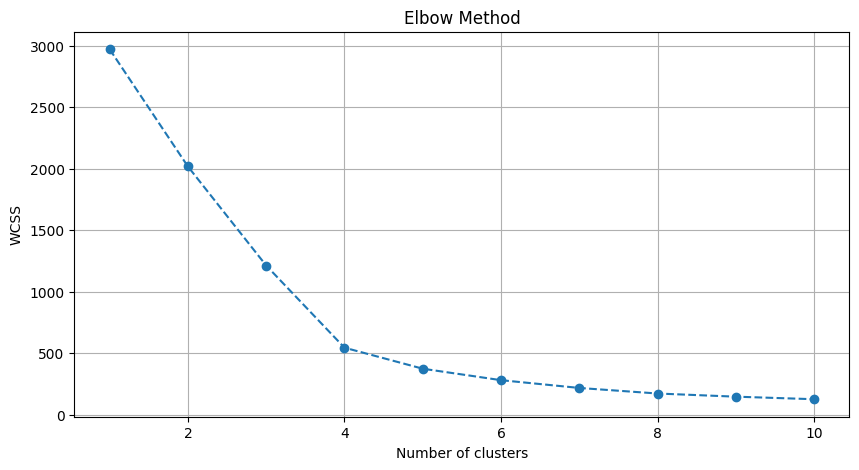

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Extract numerical features from Developers dataset
developers_numerical = developers_df[['Public Repositories', 'Followers', 'Following']]

# Standardize the data
scaler = StandardScaler()
developers_scaled = scaler.fit_transform(developers_numerical)

# Use the Elbow method to find a good number of clusters using WCSS (Within-Cluster-Sum-of-Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(developers_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [21]:
# Perform KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
developers_df["cluster"] = kmeans.fit_predict(developers_scaled)

# Calculate distance of each data point to its cluster center
distances = np.min(kmeans.transform(developers_scaled), axis=1)
developers_df["distance_to_center"] = distances

# Display the top data points that are furthest from their cluster centers
anomalies = developers_df.nlargest(10, "distance_to_center")[["dev_id", "Public Repositories", "Followers", "Following", "cluster", "distance_to_center"]]
anomalies


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,dev_id,Public Repositories,Followers,Following,cluster,distance_to_center
128,128,3841,3386,61,0,9.144045
0,0,49,49935,7,3,6.915760
1,1,47,43740,28,3,5.363710
505,505,1618,1285,156,0,3.708774
2,2,458,36518,4,3,3.664410
3,3,78,36065,3,3,3.439560
172,172,1439,2782,169,0,3.277290
25,25,18,12460,228478,1,3.205811
76,76,43,4855,303035,1,3.205811
4,4,83,34489,0,3,3.044558


From the output:

The cluster column indicates the cluster to which each developer belongs.

The distance_to_center column gives the distance of each developer (data point) from the center of their respective cluster.

These distances can be used as a measure to determine how "anomalous" a data point is relative to its cluster. The developers with the largest distance_to_center values are the most anomalous within their clusters.

From the data provided:

The developer with dev_id 128 is the most anomalous with a distance of approximately 9.144 from its cluster center.

Developers with dev_id values of 0, 1, and 2 have higher follower counts and are clustered separately (cluster 3), indicating their prominence in the developer community.

Developers with dev_id values of 25 and 76 have extraordinarily high Following counts and are placed in cluster 1, indicating an anomaly in the number of users they are following.

This approach provides a way to find unusual patterns within the data by clustering similar developers together and then examining those that stand out from their groups.

### Anomaly Elimination

Calculate the Threshold:

In [22]:
# Calculate the 95th percentile as the threshold
threshold = anomalies['distance_to_center'].quantile(0.95)


### Findout anomalies

In [24]:
# Keep only the rows with distance_to_center less than the threshold
filtered_developers_df = developers_df[developers_df['distance_to_center'] <= threshold]

filtered_developers_df

,dev_id,username,Name,Bio,Company,Location,Public Repositories,Followers,Following,listOfPinnedRepos,...,starred_repos_nameList,followers_name,following_names,achievements,status,extracted_repos_info,extracted_starred_repos_info,Bio_length,cluster,distance_to_center
0,0,karpathy,Andrej,I like to train Deep Neural Nets on large data...,Unknown,Stanford,49,49935,7,"[nanoGPT, micrograd, Minimal character-level l...",...,"[https://github.com/Lightning-AI/lit-llama, ht...","[kn00m1, prokopevaleksey, hanghust, heavychou1...","[ErikBjare, ahojnnes, petewarden, mnielsen, jn...","[Pair Extraordinaire, Public Sponsor, Arctic C...",Unknown,"[(karpathy, micrograd), (karpathy, nanoGPT), (...","[(Lightning-AI, lit-llama), (LAION-AI, Open-As...",51,3,6.915760
1,1,rafaballerini,Rafaella Ballerini,Desenvolvedora de software e criadora de conte...,Unknown,"Santa Catarina, Brasil",47,43740,28,"[GitTutorial, rafaballerini, AssistentePessoal...",...,"[https://github.com/alura/techguide, https://g...","[Eninger, MathewsLima, weesleycabral, Jaosantx...","[Math-Vieira, Unity-Technologies, rdeconti, to...","[YOLO, Starstruck, Pull Shark, Arctic Code Vau...",☕,"[(rafaballerini, rafaballerini), (rafaballerin...","[(alura, techguide), (dailydotdev, daily), (go...",80,3,5.363710
2,2,llSourcell,Siraj Raval,subscribe to my youtube channel! \r\nwww.youtu...,Unknown,"San Francisco, CA",458,36518,4,"[ChatGPT_in_5_Minutes, LearnML, ChatGPT_Tradin...",...,[https://github.com/mediasittich/Predicting-St...,"[Tednic, q1hon, Whogauravsharma, Chimex33, Fau...","[adambcomer, bogo, wbison, sonya]","[Pull Shark, Arctic Code Vault Contributor, St...",Unknown,"[(llSourcell, Make_Money_with_Tensorflow_2.0),...","[(mediasittich, Predicting-Stock-Prices-with-L...",65,3,3.664410
3,3,michaelliao,Michael Liao,Crypto developer.,Unknown,"Beijing, China",78,36065,3,"[itranswarp, warpexchange, summer-framework, l...",...,[https://github.com/michaelliao/summer-framewo...,"[GymRat102, ShunCAO, kinato123, liomen, bruce-...","[torvalds, spring-cloud, espressif]","[Quickdraw, Pair Extraordinaire, Arctic Code V...",🍖,"[(michaelliao, learngit), (michaelliao, itrans...","[(michaelliao, summer-framework), (eugene-tara...",17,3,3.439560
4,4,geohot,George Hotz,We will commoditize the petaflop.,@commaai @tinygrad,"San Diego, CA",83,34489,0,"[tinygrad, qira, minikeyvalue, fromthetransist...",...,"[https://github.com/Stability-AI/StableLM, htt...","[xqz-u, aditya-shriwastava, domcorvasce, DevPr...",[],"[Pair Extraordinaire, YOLO, Quickdraw, Pull Sh...",Unknown,"[(geohot, tinygrad), (geohot, tinyxxx), (geoho...","[(Stability-AI, StableLM), (philipturner, meta...",33,3,3.044558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1015,domenkozar,Domen Kožar,Instilling sanity into building and distributi...,@cachix,"Lanzarote, Canary Islands",248,769,34,"[cachix, devenv, cachix-action, nix.dev, getti...",...,"[https://github.com/cachix/nixpkgs-python, htt...","[exxjob, nothingnesses, kaydoh, FrancescElies,...","[cachix, ra1u, mkcdq, anamarijas, roberth, car...","[Pair Extraordinaire, Quickdraw, YOLO, Public ...",💭I may be slow to respond.,"[(domenkozar, homelab), (domenkozar, nixpkgs),...","[(cachix, nixpkgs-python), (nix-community, nix...",61,0,0.450335
986,1016,beaston02,0x,Unknown,Unknown,Unknown,8,769,0,"[CamsodaRecorder, CAM4Recorder, SMrecorder, Ca...",...,[],"[p1020119, eemailme, AshishYewale, liliknn, ma...",[],"[Arctic Code Vault Contributor, Starstruck]",Unknown,"[(beaston02, SMrecorder), (beaston02, CAM4Reco...",[],7,0,0.353198
987,1017,auvipy,Asif Saif Uddin,"Pragmatic Software Craftsman. Into C, Python, ...",@Celery @PSF @apache @encode,Bangladesh,49,769,90,"[django-activity-stream, django-sqlalchemy, dr...",...,"[https://github.com/RustPython/Parser, https:/...","[laudb, lucas03, Suryajaya2017, Melly0, gaybro...","[markshannon, dvarrazzo, isidentical, freddrak...","[Quickdraw, Pair Extraordinaire, Galaxy Brain,...",🐢Partial Summer Vacation Due to

### Step 5: Feature Processing

5.1 Handling Categorical Features
For the Developers dataset, columns like username, Name, Bio, Company, Location, status, etc., are textual in nature. For the sake of simplicity, I'll demonstrate one-hot encoding on a simpler categorical feature, like Company, but you might want to handle textual columns differently, e.g., with embeddings or other NLP techniques.

In [25]:
# One-Hot Encoding for 'Company' (as an example)
developers_df = pd.get_dummies(developers_df, columns=['Company'], drop_first=True)


5.2 Feature Scaling

We will scale the numerical features so they have the same scale. This is essential for many machine learning algorithms.

In [26]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["Public Repositories", "Following", "distance_to_center"]  # Add other numerical columns if needed
scaler = StandardScaler()
developers_df[numerical_features] = scaler.fit_transform(developers_df[numerical_features])


### Step 6: Feature Selection

6.1 Correlation Analysis:

We can drop features that are highly correlated with others, as they don't provide unique information.

In [27]:
correlation_matrix = developers_df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
developers_df.drop(columns=to_drop, inplace=True)


<ipython-input-27-cd564e00fe5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = developers_df.corr().abs()
<ipython-input-27-cd564e00fe5d>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


### Step 7: Model Building

7.1 Data Splitting

Let's split the data into training and testing sets, considering Followers as the target variable.

In [28]:
from sklearn.model_selection import train_test_split

X = developers_df.drop("Followers", axis=1)
y = developers_df["Followers"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7.2 Model Selection & Evaluation

For demonstration, I'll use a simple linear regression model. You can later expand to other models and ensemble methods.

In [42]:
# Identify columns containing lists
list_columns = [col for col in X.columns if any(X[col].apply(lambda x: isinstance(x, list)))]

# Drop these columns
X = X.drop(columns=list_columns)

# Apply the updated conversion function to the remaining affected columns
for col in affected_columns:
    if col not in list_columns:  # Ensure we're not trying to process dropped columns
        X[col] = X[col].apply(convert_string_to_number)

# Split the data again (as X has been modified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with the model training
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 8.324311607700684e+23


In [43]:
from sklearn.linear_model import Ridge

# Train Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the Ridge model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")


Ridge Regression Mean Squared Error: 6294483.261298845
